# Evaluation_Project1 - Base Ball Case Study

# Problem Statement:

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the 
number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 
different features that will be used as the inputs to the machine learning and the output will be a value that 
represents the number of wins. 

# Importing Required Libraries:

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Loading the Data Set:

In [2]:
df=pd.read_csv('baseball.csv')

In [3]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


# Attribute Information:

> # Input features: 

>Runs(R) – Runs scored: Runs declares the no.of times a player crosses home plate.

>At Bats (AB):At bats includes plate appearances, not selecting bases on balls, being hit by pitch, sacrifices and interference or obstruction.

>Hits(H):Here, hit means reaching base fairely of a batted ball without any error by the defense.

>Doubles(2B):Here, the ball hits on the batter and reaches the second base safely without any contribution in fielding error.

>Triples(3B):Here also, the ball hits on the batter and reaches the third base safely without any contribution in fielding error.

>Homeruns(HR):The ball hits on the batter successfully and touches all the four bases, without any contribution in fielding error.

>Walks(BB):Walks is also known as base on ball.Here, the hitter is not swinging at four pitches which is called out of the strike zone and also awarded first base.

>Strikeouts(SO):IT says the number of batters who received strike three during the time at bat.

>Stolen Bases(SB): Stolen base occurs when a runner advances to a base to which he is not entitled and the official scorer rules that the advance should be credited to the action of the runner. 

>Runs Allowed(RA):It refers to measures of the rate at which runs are allowed or scored. For pitchers, the run average is the number of runs—earned or unearned—allowed per nine innings.

>Earned Runs(ER):In baseball, an earned run is any run that was fully enabled by the offensive team's production in the face of competent play from the defensive team. 

>Earned Run Average (ERA):It is the average of earned runs allowed by a pitcher per nine innings pitched (i.e. the traditional length of a game).

>Shutouts(SHO): Refers to the act by which a single pitcher pitches a complete game and does not allow the opposing team to score a run. 

>Saves(sv):It is the number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering the lead, is not the winning pitcher, and either the lead was three runs or fewer when the pitcher entered the game or the potential tying run was on base, at bat, or on deck or the pitcher pitched three or more innings.

>Complete Games(CG):A pitcher who meets this criterion will be credited with a complete game regardless of the number of innings played—pitchers who throw an entire official game that is shortened by rain will still be credited with a complete game, while starting pitchers who are relieved in extra innings after throwing nine or more innings will not be credited with a complete game.

>Errors(E):an error is an act, in the judgment of the official scorer, of a fielder misplaying a ball in a manner that allows a batter or baserunner to advance one or more bases or allows a plate appearance to continue after the batter should have been put out.

> # Output: 

>Number of predicted wins (W)-number of games where pitcher was pitching while their team took the lead and went on to win, also the starter needs to pitch at least 5 innings of work (also related: winning percentage).

In [7]:
df['W'].unique()

array([ 95,  83,  81,  76,  74,  93,  87,  80,  78,  88,  86,  85,  68,
       100,  98,  97,  64,  90,  71,  67,  63,  92,  84,  79], dtype=int64)

In [8]:
 #To get the data dimension 
df.shape

(30, 17)

In [9]:
#To get all the information regarding data set:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [10]:
df.isnull().sum() #checking the null value count of all the coulumns

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

# Checking the null values Using Heat Map:

<AxesSubplot:>

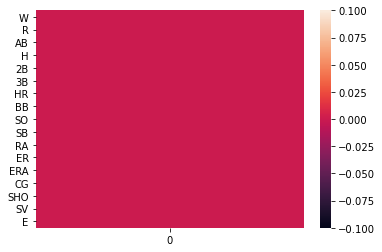

In [11]:
sns.heatmap(df.isnull().sum().to_frame())

>This color represents ,no feature has a null value,so we can proceed to next processing of describing data.

# Describing Data Sets:

In [40]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


>Since there are more no of column we will find the skewness and outliers in the upcoming process.

In [12]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

# Graphical Analysis:

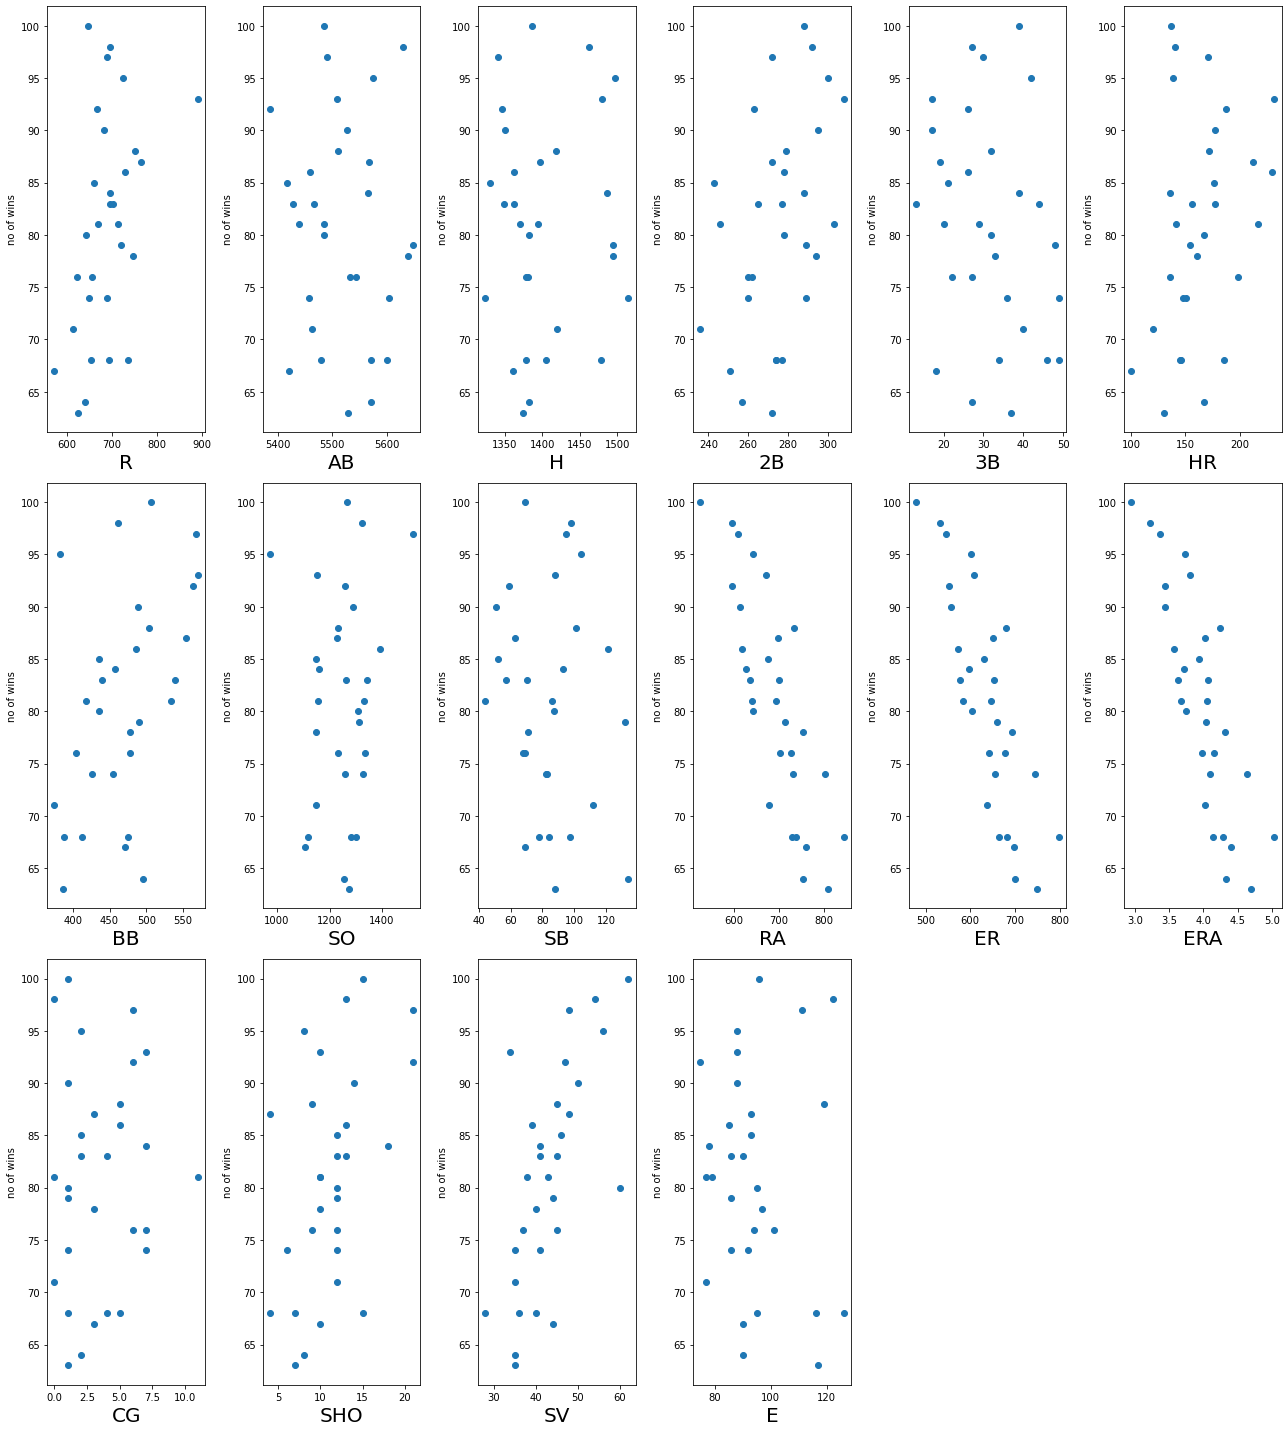

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

y=df['W']
x=df.drop(columns=['W'])
plt.figure(figsize=(18,20),facecolor='white')
plotnumber=1
for column in x:
    if plotnumber<=16:
        ax=plt.subplot(3,6,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('no of wins',fontsize=10)
    plotnumber+=1 
plt.tight_layout()

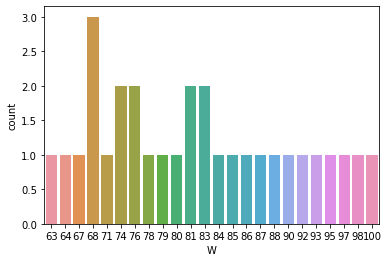

In [10]:
sns.countplot(x='W',data=df)
plt.show()


>Here,in the target variable Wins(W) there are 3 times 68 no of wins,2 times 81 and 83 no of wins and rest all values has one time wins.


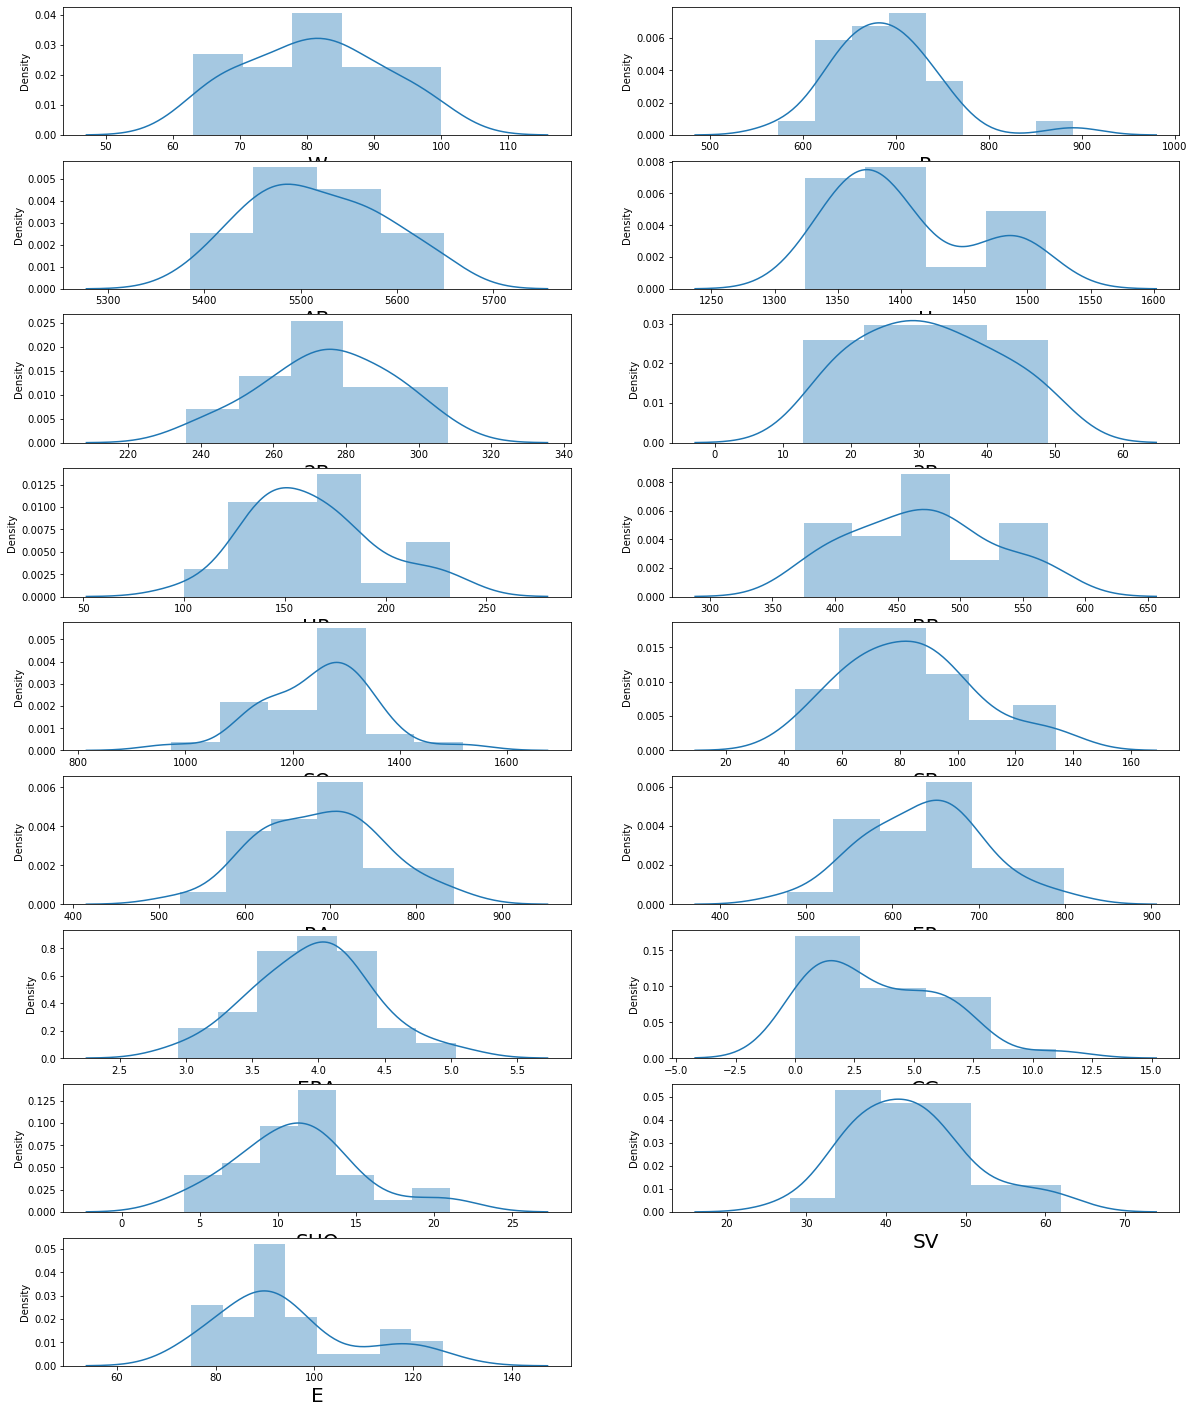

In [11]:
plt.figure(figsize=(20,25))
plotnumber=1
for column in df:
    if plotnumber<=18:
        ax=plt.subplot(9,2,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show() 

> # Observation:

All the 17 features mentioned above are normally distributed.we check the correlation of all the features.

Wins,Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors almost all the features are having left and right skewness which can be removed further.

# Correlation:

# Correlation Using Heatmap:

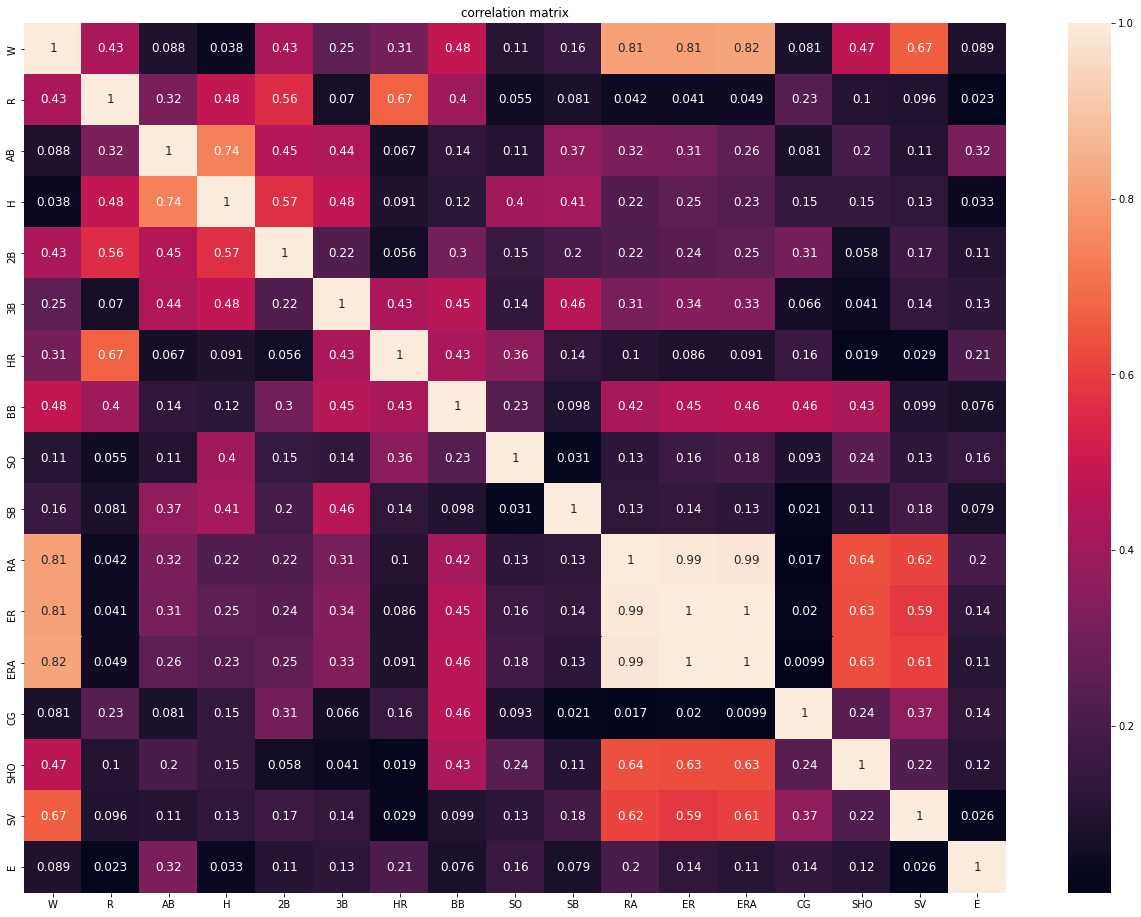

In [43]:
df_corr=df.corr().abs()

plt.figure(figsize=(22,16))
sns.heatmap(df_corr,annot=True,annot_kws={'size':12})
plt.title('correlation matrix')
plt.show() 

> # Outcome of Correlation:
    
   All the columns of the dataset is positively correlated with the target column.

   Maximun correlated features:Runs Allowed(RA),Earned Runs(ER) and Earned Run Average (ERA)

   Minimun correlated features:Errors(E) and Complete Game(CG)


# Correlation of all the features with respect to the target variable

In [13]:
corr=df.corr()
corr['W'].sort_values(ascending=False)

W      1.000000
SV     0.666530
BB     0.484342
SHO    0.471805
R      0.430751
2B     0.427797
HR     0.307407
SO     0.111850
CG     0.080533
H      0.037612
AB    -0.087947
E     -0.089485
SB    -0.157234
3B    -0.251118
ER    -0.809435
RA    -0.812952
ERA   -0.819600
Name: W, dtype: float64

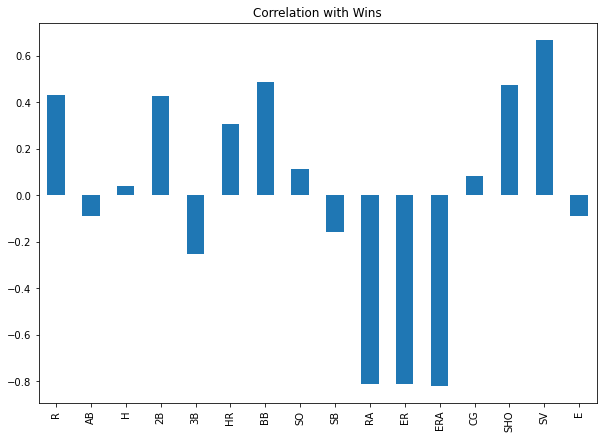

In [14]:
df.drop('W',axis=1).corrwith(df.W).plot(kind='bar',grid=False,figsize=(10,7),title='Correlation with Wins')
plt.show()

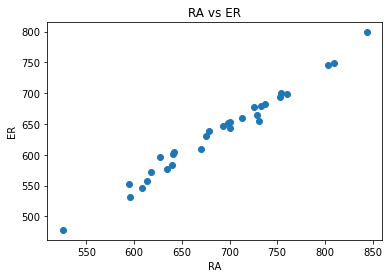

In [13]:
plt.scatter(df.RA,df.ER)
plt.xlabel('RA')
plt.ylabel('ER')
plt.title('RA vs ER')
plt.show()

Correlation of Wins variable with all the other feature variables in the data set is shown above

# Removing multicollinearity problem:

In [4]:
df=df.drop(columns='ER',axis=1)

# Checking outliers:

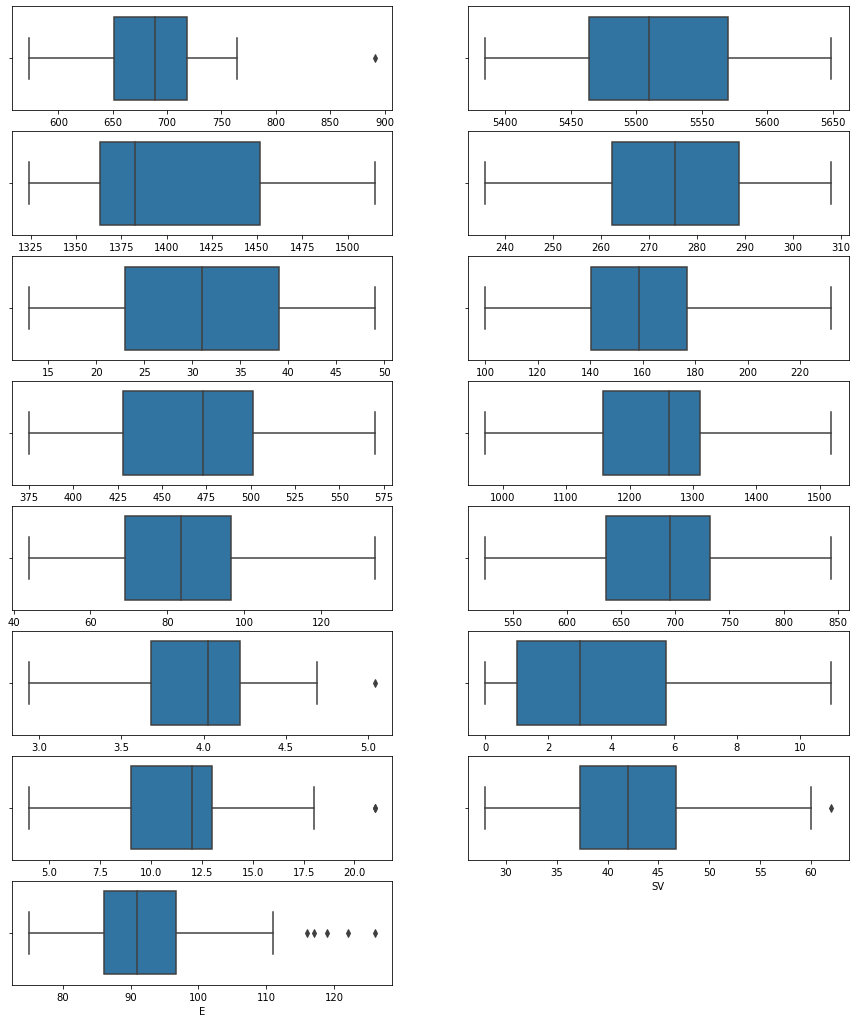

In [47]:
x=df.drop(columns=['W'])
plt.figure(figsize=(15,18))
graph=1
for column in x:
    if graph<=16:
        ax=plt.subplot(8,2,graph)
        sns.boxplot(x[column],orient='v')
        plt.xlabel(column)
    graph+=1
plt.show()  

> Here , it seems to have no much outliers in all the features except Error(E) variable.so we can proceed to check whether it has any skew ness to remove it.

# Skewness:

In [48]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

>Skewness threshold is taken as +/-0.5.Columns which are having skewness which effects the model are:R,CG and E.

# Droping the columns which has high skewness:

In [5]:
df=df.drop(columns=['E'],axis=1)

In [17]:
df.shape # Checking the dimension


(30, 15)

In [6]:
df.head()#getting the first 5 rows data

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ERA,CG,SHO,SV
0,95,724,5575,1497,300,42,139,383,973,104,641,3.73,2,8,56
1,83,696,5467,1349,277,44,156,439,1264,70,700,4.07,2,12,45
2,81,669,5439,1395,303,29,141,533,1157,86,640,3.67,11,10,38
3,76,622,5533,1381,260,27,136,404,1231,68,701,3.98,7,9,37
4,74,689,5605,1515,289,49,151,455,1259,83,803,4.64,7,12,35


# Feature selection method:

In [7]:
from sklearn.feature_selection import SelectKBest,f_classif
x=df.drop('W',axis=1)
y=df.W
best_features=SelectKBest(score_func=f_classif,k=12)
fit=best_features.fit(x,y)
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(x.columns)
feature_scores=pd.concat([df_columns,df_scores],axis=1)
feature_scores.columns=['Feature_name','Score']
feature_scores.nlargest(12,'Score')

,Feature_name,Score
0,R,4.325471
8,SB,3.145176
13,SV,2.966365
9,RA,2.420967
10,ERA,1.665038
1,AB,1.552727
7,SO,1.509218
12,SHO,1.204067
6,BB,1.048384
5,HR,0.989166


These are the best and top 12 features which contributes best score.

# Creating new dataset with the best features :

In [8]:
df=df[['W','R','SB','SV','RA','ERA','AB','SO','SHO','BB','HR','2B','3B']]
df.head()

,W,R,SB,SV,RA,ERA,AB,SO,SHO,BB,HR,2B,3B
0,95,724,104,56,641,3.73,5575,973,8,383,139,300,42
1,83,696,70,45,700,4.07,5467,1264,12,439,156,277,44
2,81,669,86,38,640,3.67,5439,1157,10,533,141,303,29
3,76,622,68,37,701,3.98,5533,1231,9,404,136,260,27
4,74,689,83,35,803,4.64,5605,1259,12,455,151,289,49


# Removing Outliers:

Z-Score Technique:

In [9]:
from scipy.stats import zscore
import numpy as np
zsc=zscore(df)
abs_z_score=np.abs(zsc)
filtering_entry=(abs_z_score<3).all(axis=1)
df=df[filtering_entry]
df.head()

,W,R,SB,SV,RA,ERA,AB,SO,SHO,BB,HR,2B,3B
0,95,724,104,56,641,3.73,5575,973,8,383,139,300,42
1,83,696,70,45,700,4.07,5467,1264,12,439,156,277,44
2,81,669,86,38,640,3.67,5439,1157,10,533,141,303,29
3,76,622,68,37,701,3.98,5533,1231,9,404,136,260,27
4,74,689,83,35,803,4.64,5605,1259,12,455,151,289,49


In [10]:
df.shape#checking the shape of the dataset

(29, 13)

# Percentage Data Loss:

In [11]:
loss_percent=(30-29)/30*100
loss_percent

3.3333333333333335

There is no much loss in data.

# Model with desired outliers:

In [39]:
x=df.drop(columns='W')
y=df.W

# Transforming Data to remove skwness:

In [40]:
from sklearn.preprocessing import power_transform
x=power_transform(x)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 9.62543504e-01,  9.36131648e-01,  1.53275292e+00,
        -6.60978697e-01, -5.09292146e-01,  0.00000000e+00,
        -2.55061247e+00, -7.87002186e-01, -1.60519802e+00,
        -7.41927000e-01,  1.68518793e+00,  1.00615029e+00],
       [ 2.98863300e-01, -5.16377335e-01,  3.12020186e-01,
         1.60225829e-01,  2.41440214e-01,  0.00000000e+00,
         9.36832915e-02,  2.36736538e-01, -4.62095966e-01,
        -1.09958425e-01,  1.38197902e-01,  1.18522654e+00],
       [-3.12105130e-01,  2.25038365e-01, -6.64136739e-01,
        -6.74967476e-01, -6.42097599e-01,  0.00000000e+00,
        -9.35611465e-01, -2.52844176e-01,  1.23209786e+00,
        -6.64354121e-01,  1.90738550e+00, -2.28819392e-01],
       [-1.30829774e+00, -6.18421529e-01, -8.20688859e-01,
         1.74076810e-01,  4.30132461e-02,  0.00000000e+00,
        -2.30682707e-01, -5.13554932e-01, -1.16272085e+00,
        -8.60039342e-01, -8.37664770e-01, -4.32227907e-01],
       [ 1.37737301e-01,  9.50377681e-02, -1.1491647

# Model Building:

In [41]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Train-Test Split:

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=41)


# LinearRegression Model:

In [43]:
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [44]:
y_pred=regression.predict(x_test)
y_pred

array([81.42867744, 95.2844305 , 81.16331166, 73.00359419, 86.91003575,
       87.22230544])

In [45]:
y_trpred=regression.predict(x_train)
y_trpred

array([ 62.43913509,  86.37212742,  86.03575811, 100.18177682,
        81.94850539,  71.90154165,  84.69205182,  90.0710606 ,
        70.10492428,  66.0063342 ,  81.07533391,  64.31832014,
        73.72344616,  83.52589992,  71.70776435,  71.31522265,
        89.37195737,  83.58375593,  92.76141528,  79.24195215,
        75.21343944,  71.82953426,  91.57874306])

In [46]:
r2_score(y_test,y_pred) #r2 score of linear regression model

0.8229485677836239

# Linear Regression Curve:

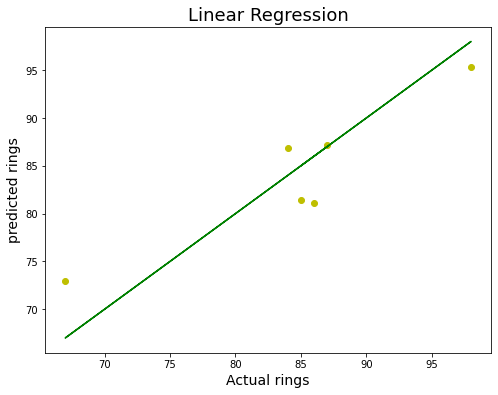

In [47]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred,color='y')
plt.plot(y_test,y_test,color='g')
plt.xlabel('Actual rings',fontsize=14)
plt.ylabel('predicted rings',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

# Model1:

# Hyper Parameter tuning:

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

parameters={'alpha':[0.0001,.001,.01,.1,1,10], 'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


# Lasso regression model

In [73]:
ls=Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)

lss=r2_score(y_test,pred_ls)
lss

0.9037404850757004

# CrossValidation score for lasso model:

In [74]:
csv=cross_val_score(ls,x,y,cv=4)
cv_mean=csv.mean()
cv_mean

0.7513102474517991

# Model2:

# Hyper parameter tuning for ensemble approach:

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


parameters={'criterion':['mse', 'mae'],
            'max_features':['auto', 'sqrt', 'log2'],
            'max_depth':[10,15],
            'min_samples_split':[10,11]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_depth': 15, 'max_features': 'auto', 'min_samples_split': 10}


# CrossValidation score for RandomForestRegressor model:

In [53]:
rf=RandomForestRegressor(criterion='mse',max_features='auto',max_depth=15,min_samples_split=10)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_rf=rf.predict(x_test)

rfs=r2_score(y_test,pred_rf)
print('R2 Score: ',rfs*100)

rfcsv=cross_val_score(rf,x,y,cv=4)
rf_cv_mean=rfcsv.mean()
print('Cross validation Score: ',rf_cv_mean*100)

R2 Score:  57.01980173659042
Cross validation Score:  41.79479841249471


# Model3:

# Hyper parameter tuning for DecisionTreeRegressor approach:

In [71]:
from sklearn.tree import DecisionTreeRegressor

param_grid={'criterion':['mse', 'mae'],
            'max_depth':range(10,15),
            'min_samples_split':range(3,8),
            'max_features':['auto', 'sqrt', 'log2'],
            #'max_leaf_nodea':range(3,7)
           }
dtr=DecisionTreeRegressor()
clf=GridSearchCV(dtr,param_grid)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_depth': 10, 'max_features': 'auto', 'min_samples_split': 3}


# CrossValidation score for DecisionTreeRegressor model:

In [72]:
dtr=DecisionTreeRegressor(criterion='mse',max_features='auto',max_depth=13,min_samples_split=5)
dtr.fit(x_train,y_train)
dtr.score(x_train,y_train)
pred_dtr=dtr.predict(x_test)

dtrs=r2_score(y_test,pred_dtr)
print('R2 Score: ',dtrs*100)

dtrcsv=cross_val_score(dtr,x,y,cv=4)
dtr_cv_mean=dtrcsv.mean()
print('Cross validation Score: ',dtr_cv_mean*100)

R2 Score:  16.834170854271356
Cross validation Score:  -27.03947847991406


# Model4:

# Hyper parameter tuning for KNN model:

In [62]:
from sklearn.neighbors import KNeighborsRegressor

param_grid={'algorithm':['kd-tree','brute'],
            'leaf_size':[3,5 ,6,7,8],
            'n_neighbors':[3,5,7,9,11,13],
            'p':[1,2]}
knr=KNeighborsRegressor()
clf=GridSearchCV(knr,param_grid)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'algorithm': 'brute', 'leaf_size': 3, 'n_neighbors': 5, 'p': 2}


# CrossValidation score for KNeighborsRegressor model:

In [63]:
knr=KNeighborsRegressor(algorithm='brute',leaf_size=3,n_neighbors=5,p=2)
knr.fit(x_train,y_train)
knr.score(x_train,y_train)
pred_knr=knr.predict(x_test)

knrs=r2_score(y_test,pred_knr)
print('R2 Score: ',knrs*100)

knrcsv=cross_val_score(knr,x,y,cv=4)
knr_cv_mean=knrcsv.mean()
print('Cross validation Score: ',knr_cv_mean*100)

R2 Score:  52.144723618090424
Cross validation Score:  46.00350102297574


# @Since the Linear regressionmodel (Model1) without outliers performing  well !We will select tha data frame


# Saving the model:

In [81]:
import pickle
filename='Baseball.pkl'
pickle.dump(ls,open(filename,'wb'))

# Conclusion:

In [83]:
import numpy as np
a=np.array(y_test)
predicted=np.array(ls.predict(x_test))
df_com=pd.DataFrame({'Original':a,'Predicted':predicted},index=range(len(a)))
df_com.head()

,Original,Predicted
0,85,81.059916
1,98,93.433906
2,86,86.249289
3,67,69.981255
4,84,84.558289
